###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Twitter US Airline Sentiment Classifier </span>
Twitter US Airline Sentiment

- A sentiment analysis job about the problems of each major U.S. airline.
- Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").


- The project is from a dataset from Kaggle.
- Link to the Kaggle project site:https://www.kaggle.com/crowdflower/twitter-airline-sentiment
- The dataset has to be downloaded from the above Kagglewebsite.

In [1]:
# install and import necessary libraries.

# !pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer. For removing stem words
import unicodedata                                      # Removing accented characters

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91905\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91905\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91905\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Reading the Data </span>

In [2]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

In [3]:
data.shape                                               # print shape of data.

(14640, 15)

In [4]:
data.head(2)                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)


In [5]:
data.isnull().sum(axis=0)                                # Check for NULL values.

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Building the dataset for further Deep Dive </span>

For text classification and model development, columns text and airline_sentiment are chosen.

In [6]:
data = data[['text', 'airline_sentiment']]

In [7]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [8]:
data['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [9]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

###  <span style="font-family: Calibri; font-size:1.2em;color:#000055"> Data Preprocessing </span>

- Remove html tags using BeautifulSoup
- Remove https using regex
- Replace contractions in string. (e.g. replace I'm --> I am) and so on using contraction.fix()
- Remove numbers using re(), re is basicially regex function
- Check Language of the Tweet
- Tokenization - Converting lines into token or words
- To remove Stopword - removing unnecessary words, note that since this is a sentiment analysis only a few stopwords are used
- Lemmatized data - lematization
- We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> HTML Tag Removal

In [10]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [11]:
for i, row in data.iterrows():
    clean_text = re.sub(r"http\S+", "", data.at[i, 'text']) #--Extracting anything that follows http till a space is encountered
    clean_text = re.sub(r"https",'',clean_text)
    data.at[i,'text'] = clean_text
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Conraction Removal

In [12]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Numbers Removal

In [13]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Language Check </span>

In [ ]:
from langdetect import detect

data['Language'] = ""

for i, desc in enumerate(data['text']):
    try:
        data['Language'][i] = detect(desc)
    except:
        data['Language'][i] = 'unknown'

In [ ]:
data['Language'].value_counts()

In [ ]:
data[data['Language']=='it'].head()

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Tokenizer </span>

In [14]:
from nltk.tokenize import TweetTokenizer
tknzr=TweetTokenizer()

In [15]:
data['text'] = data.apply(lambda row: tknzr.tokenize(row['text']), axis=1) # Tokenization of data

In [16]:
data.head()                                                                    # Look at how tokenized data looks.

,text,airline_sentiment
0,"[@VirginAmerica, What, @dhepburn, said, .]",neutral
1,"[@VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, "", entertainment, "", in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Stopwords </span>

In [17]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Normalize </span>

In [19]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Count Vectorizer </span>

In [20]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000)                # Keep only 5000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [21]:
data_features.shape

(14640, 10000)

In [22]:
data_features[0].sum()

3

In [23]:
X = data_features

y = data.airline_sentiment

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Stratified K Fold - Cross Validation </span>

In [24]:
from sklearn.model_selection import StratifiedKFold

In [25]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Model Development using Count Vectorize </span>

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import MultinomialNB


from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix


import numpy as np

In [27]:
model_nb = MultinomialNB()
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=22)
model_rf = RandomForestClassifier(max_samples=0.8, random_state=22)
model_bg = BaggingClassifier(bootstrap=True, random_state=22)
model_ab = AdaBoostClassifier(random_state=22)
model_gb=GradientBoostingClassifier(random_state=22)


In [28]:
models=[model_nb,model_dt, model_rf, model_bg]
model_nm=['Naive Bayes','Decision Tree','Random Forest','Bagging']

In [29]:
model_name=[]
technique_type=[]
train_score=[]
test_score=[]
cv_min=[]
cv_max=[]
cv_av=[]
cv_std=[]
std_score=[]

i=0
for m in models:
    
    m.fit(X_train, y_train)
    
    print(model_nm[i])
    
    model_name.append(model_nm[i])
    i+=1
    
    train_score.append(m.score(X_train,y_train))
    test_score.append(m.score(X_test,y_test))
    
    sf=StratifiedKFold(n_splits=5, random_state=20, shuffle=True)
    kf=cross_val_score(m, X_train, y_train, cv=sf)
    
    cv_min.append(np.min(kf))
    cv_max.append(np.max(kf))
    cv_av.append(np.mean(kf))
    cv_std.append(np.std(kf))
    technique_type.append('Count Vectorize')


Naive Bayes
Decision Tree
Random Forest
Bagging


In [30]:
test_score

[0.773224043715847, 0.7049180327868853, 0.7786885245901639, 0.7531876138433515]

In [31]:
kf

array([0.72829268, 0.73317073, 0.72243902, 0.72620791, 0.72718399])

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Model Output using Count Vectorize </span>

In [32]:
Results_Cv=pd.DataFrame()
Results_Cv['Model']=model_name
Results_Cv['Technique']=technique_type
Results_Cv['Train Acc']=train_score
Results_Cv['Cross Val - Min Accuarcy']=cv_min
Results_Cv['Cross Val - Avg Accuarcy']=cv_av
Results_Cv['Cross Val - Max Accuarcy']=cv_max
Results_Cv['Cross Val - Std of Accuarcy']=cv_std
Results_Cv['Test']=test_score
Results_Cv

,Model,Technique,Train Acc,Cross Val - Min Accuarcy,Cross Val - Avg Accuarcy,Cross Val - Max Accuarcy,Cross Val - Std of Accuarcy,Test
0,Naive Bayes,Count Vectorize,0.838115,0.744265,0.750097,0.768293,0.009181,0.773224
1,Decision Tree,Count Vectorize,0.995219,0.681796,0.696135,0.705710,0.008318,0.704918
2,Random Forest,Count Vectorize,0.994340,0.752074,0.761417,0.773659,0.008311,0.778689
3,Bagging,Count Vectorize,0.971604,0.722439,0.727459,0.733171,0.003469,0.753188


###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> Confusion Matrix </span>

[[2595  169   50]
 [ 392  423   69]
 [ 192  100  402]]


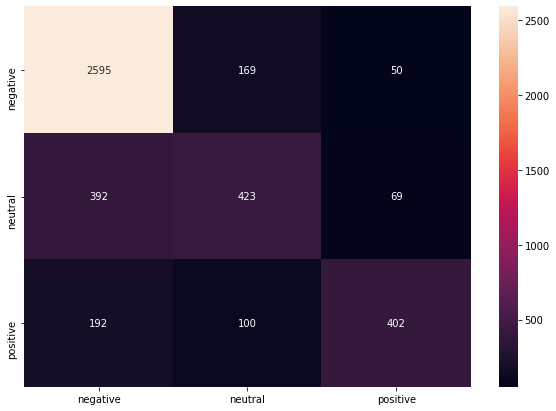

In [33]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

result=model_rf.predict(X_test)

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral','positive']],
                  columns = [i for i in ['negative', 'neutral','positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> TFIDF ID </span>

In [34]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 10000)

In [35]:
data_features[0].sum()

1.5979352257716268

In [36]:
X = data_features

y = data.airline_sentiment

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
model_nb = MultinomialNB()
model_dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
model_rf = RandomForestClassifier(max_samples=0.8, random_state=42)
model_bg = BaggingClassifier(bootstrap=True, random_state=22)
model_ab = AdaBoostClassifier(random_state=22)
model_gb=GradientBoostingClassifier(random_state=22)


In [39]:
models=[model_nb,model_dt, model_rf, model_bg]
model_nm=['Naive Bayes','Decision Tree','Random Forest','Bagging']

In [40]:
model_name=[]
train_score=[]
test_score=[]
cv_min=[]
cv_max=[]
cv_av=[]
cv_std=[]
std_score=[]

i=0
for m in models:
    
    m.fit(X_train, y_train)
    
    print(model_nm[i])
    
    model_name.append(model_nm[i])
    i+=1
    
    train_score.append(m.score(X_train,y_train))
    test_score.append(m.score(X_test,y_test))
    
    sf=StratifiedKFold(n_splits=5, random_state=20, shuffle=True)
    kf=cross_val_score(m, X_train, y_train, cv=sf)
    
    
    
    cv_min.append(np.min(kf))
    cv_max.append(np.max(kf))
    cv_av.append(np.mean(kf))
    cv_std.append(np.std(kf))


Naive Bayes
Decision Tree
Random Forest
Bagging


In [41]:
cv_min

[0.6603221083455344,
 0.6661786237188873,
 0.7419512195121951,
 0.7126829268292683]

In [42]:
kf

array([0.72341463, 0.7404878 , 0.71268293, 0.71400683, 0.73108834])

In [44]:
Results=pd.DataFrame()
Results['Model']=model_name
Results['Technique']='TF-IDF'
Results['Train Acc']=train_score
Results['Cross Val - Min Accuarcy']=cv_min
Results['Cross Val - Avg Accuarcy']=cv_av
Results['Cross Val - Max Accuarcy']=cv_max
Results['Cross Val - Std of Accuarcy']=cv_std
Results['Test']=test_score
Results

,Model,Technique,Train Acc,Cross Val - Min Accuarcy,Cross Val - Avg Accuarcy,Cross Val - Max Accuarcy,Cross Val - Std of Accuarcy,Test
0,Naive Bayes,TF-IDF,0.720043,0.660322,0.665886,0.667805,0.002800,0.698770
1,Decision Tree,TF-IDF,0.995219,0.666179,0.672228,0.682439,0.005666,0.695128
2,Random Forest,TF-IDF,0.994633,0.741951,0.755757,0.762811,0.008089,0.772541
3,Bagging,TF-IDF,0.969653,0.712683,0.724336,0.740488,0.010486,0.742714


In [45]:
result = model_rf.predict(X_test)

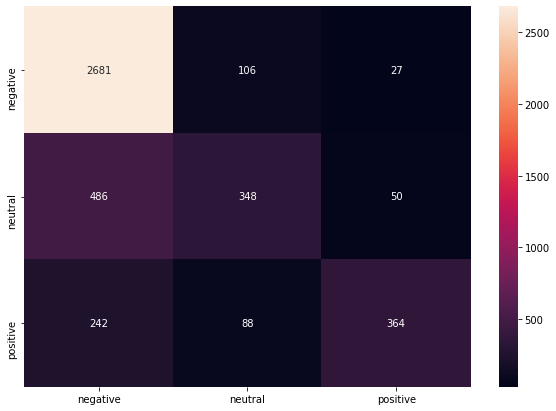

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in ['negative', 'neutral','positive']],
                  columns = [i for i in ['negative', 'neutral','positive']])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

Summary:

- We used dataset which has tweets in text format and their sentiment type (positive, negative and neutral).
- The goal was to build a model for text-classification.
- We Pre-processed the data using variuos techniques and libraries.
- The pre-precessed data is converted to numbers, so that we can feed the data in the model.
- After building the classification model, we predicted the result for the test data.
- After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
- One more way to increase accuracy is to use different variations of Pre-processing techniques.

###  <span style="font-family: Calibri; font-size:1.0em;color:#000055"> SMOTE </span>

In [47]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [48]:
smt = SMOTE(random_state=0)
X_train, y_train = smt.fit_sample(X_train, y_train)

In [49]:
X_train.shape

(19092, 10000)

In [50]:
y_train.shape

(19092,)

In [51]:
y_train.value_counts()

neutral     6364
positive    6364
negative    6364
Name: airline_sentiment, dtype: int64

In [52]:
model_name=[]
train_score=[]
test_score=[]
cv_min=[]
cv_max=[]
cv_av=[]
cv_std=[]
std_score=[]

i=0
for m in models:
    
    m.fit(X_train, y_train)
    
    print(model_nm[i])
    
    model_name.append(model_nm[i])
    i+=1
    
    train_score.append(m.score(X_train,y_train))
    test_score.append(m.score(X_test,y_test))
    
    sf=StratifiedKFold(n_splits=5, random_state=20, shuffle=True)
    kf=cross_val_score(m, X_train, y_train, cv=sf)
    
    
    
    cv_min.append(np.min(kf))
    cv_max.append(np.max(kf))
    cv_av.append(np.mean(kf))
    cv_std.append(np.std(kf))

Naive Bayes
Decision Tree
Random Forest
Bagging


In [53]:
Results_Smote=pd.DataFrame()
Results_Smote['Model']=model_name
Results_Smote['Train Acc']=train_score
Results_Smote['Cross Val - Min Accuarcy']=cv_min
Results_Smote['Cross Val - Avg Accuarcy']=cv_av
Results_Smote['Cross Val - Max Accuarcy']=cv_max
Results_Smote['Cross Val - Std of Accuarcy']=cv_std
Results_Smote['Test']=test_score
Results_Smote

,Model,Train Acc,Cross Val - Min Accuarcy,Cross Val - Avg Accuarcy,Cross Val - Max Accuarcy,Cross Val - Std of Accuarcy,Test
0,Naive Bayes,0.883826,0.833159,0.840404,0.847342,0.005786,0.765483
1,Decision Tree,0.995338,0.759298,0.766080,0.768727,0.003613,0.688525
2,Random Forest,0.995286,0.881090,0.888382,0.893428,0.004999,0.767987
3,Bagging,0.982401,0.811420,0.818982,0.822420,0.004040,0.726548
